Pretraining Autoencoder for Downstream Tasks
===

## Overview

In this notebook, we train a mini VGG-based autoencoder on the Fashion-MNIST dataset.

## Setup

We setup our libraries.

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

__author__ = 'Abien Fred Agarap'
__version__ = '1.0.0'

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tf.vgg_ae import CAE

Set the memory growth of GPU.

In [ ]:
tf.config.experimental.set_memory_growth(
    tf.config.experimental.list_physical_devices('GPU')[0], True
)

Set the random number generator seed value.

In [ ]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

We set the batch size and epochs.

In [ ]:
batch_size = 64
epochs = 100

## Dataset

We load our dataset.

In [5]:
(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


We preprocess our dataset.

In [ ]:
train_features = train_features.reshape(-1, 28, 28, 1)

train_features = train_features.astype('float32')
train_features = train_features / 255.

test_features = test_features.reshape(-1, 28, 28, 1)

test_features = test_features.astype('float32')
test_features = test_features / 255.

train_labels = tf.one_hot(train_labels, len(np.unique(train_labels)))
test_labels = tf.one_hot(test_labels, len(np.unique(test_labels)))

We create a dataset object.

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_features))
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.prefetch(batch_size * 4)
train_dataset = train_dataset.shuffle(train_features.shape[0])

test_dataset = tf.data.Dataset.from_tensor_slices((test_features, test_features))
test_dataset = train_dataset.batch(batch_size)
test_dataset = train_dataset.prefetch(batch_size * 4)
test_dataset = train_dataset.shuffle(test_features.shape[0])

In [ ]:
model = CAE(input_shape=(28, 28, 1))

In [ ]:
for train_features, _ in train_dataset:
    model(train_features)
    break

In [10]:
model.summary()

Model: "cvae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Encoder)            multiple                  64992     
_________________________________________________________________
decoder (Decoder)            multiple                  92609     
Total params: 157,601
Trainable params: 157,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=tf.losses.mean_squared_error, optimizer=tf.optimizers.Adam(learning_rate=1e-3))

In [12]:
model(train_features).shape

TensorShape([64, 28, 28, 1])

In [13]:
model.fit(train_dataset, epochs=10, verbose=2)

Epoch 1/10
938/938 - 27s - loss: 0.0099
Epoch 2/10
938/938 - 26s - loss: 0.0014
Epoch 3/10
938/938 - 26s - loss: 8.6296e-04
Epoch 4/10
938/938 - 26s - loss: 6.1461e-04
Epoch 5/10
938/938 - 26s - loss: 4.6100e-04
Epoch 6/10
938/938 - 26s - loss: 3.7346e-04
Epoch 7/10
938/938 - 26s - loss: 2.9189e-04
Epoch 8/10
938/938 - 26s - loss: 2.5333e-04
Epoch 9/10
938/938 - 26s - loss: 2.1175e-04
Epoch 10/10
938/938 - 26s - loss: 1.9244e-04


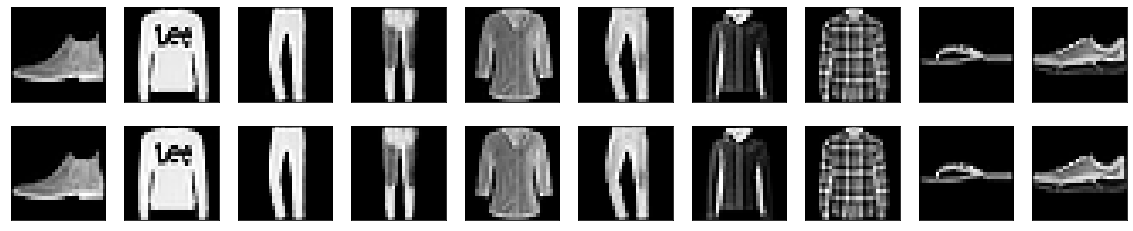

In [14]:
number = 10
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(test_features[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(test_features[index].reshape(-1, 28, 28, 1)).numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
model.save_weights('../assets/export/fashion_mnist/mini_vgg_ae_fashion_mnist', save_format='tf')